# Ensemble Methods (Continued)

This Jupyter Notebook is dedicated to understanding and implementing ensemble methods for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

- [SciKit Learn](https://scikit-learn.org/stable/)

## Description of the Algoirthm:

***
### **Ensemble methods:**

Ensemble methods in machine learning are techniques that combine multiple individual models to produce a stronger predictive model.

The idea is that by aggregating the predictions of multiple models, you can often achieve better performance than any single model could achieve on its own.

In this notebook, I will continue by study of the ensemble methods by going into boosting.

**Boosting:**
- Boosting is an ensemble learning technique that sequentially combines weaker models to create a strong model.
- Each initial model focuses on instances that were previously misclassified, and their predictions are aggregated with weights to form the final prediction.
- Boosting adaptsively adjusts the weights of training examples during training, leading to improved generalization performance and higher accuracy compared to individual base models.

Here is a graphic describing boosting:

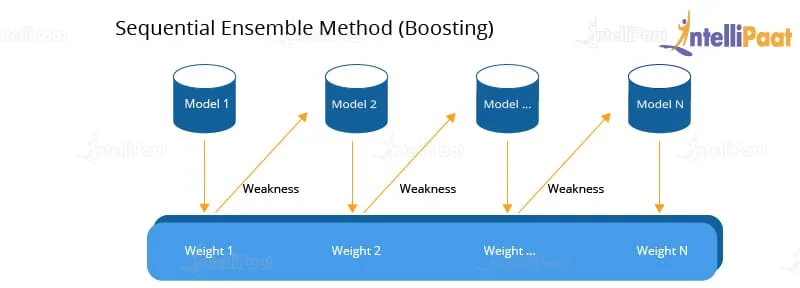

As you can see, boosting works with multiple models to try a compensate for the weaknesses in each model. Let's go into some more specific types of boosting now:

**AdaBoost:**
- First, the training algorithm trains a base model and uses it to make predictions on the training set.
- Then, each of the misclassified training instances is then given a relative weight.
- The next classifier is then trained on the dataset using these relative weights, allowing the model to identify the hard-to-classify points.

**Gradient Boosting:**
- Like AdaBoost, Gradient Boosting sequentially builds a set of weaker models to create a strong model later.
- It optimizes a loss function using gradient descent to minimize the errors of the previous weak learners.
- By combining the predictions of weak models through a weighted sum, it results in a powerful predictive model with high accuracy.

Image source: [Intellipaat](https://intellipaat.com/blog/gradient-boosting-in-machine-learning/).
***

## AdaBoost:

***
**Implementation:**
- Start by initializing a base model (we often use decision trees) and fit it to the training data.
- Calculate the weighted error of the base learner's predictions.
- Update the weights of the training instances, giving higher weights to misclassified instances.
- Repeat the process with a new base learner, adjusting the weights at each iteration.
- Combine the predictions of all base learners using a weighted sum to make the final prediction.

Here is an image demonstrating the algorithm:

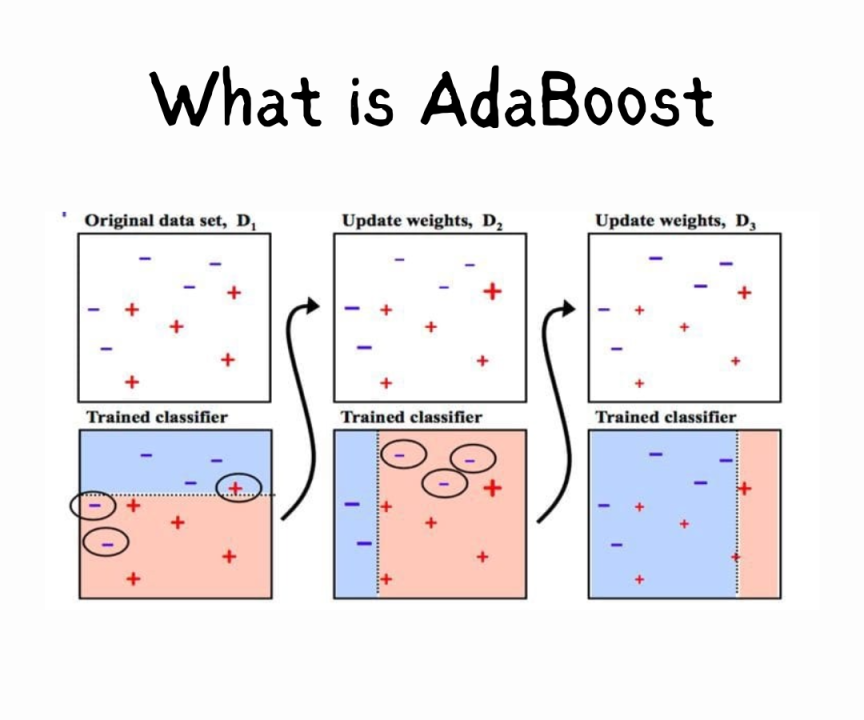

**Advantages:**
1. AdaBoost often achieves high accuracy by combining multiple weak learners.
2. It can be used with various base learners and is suitable for a wide range of classification problems.
3. AdaBoost tends to be less prone to overfitting compared to other complex models.

**Disadvantages:**
1. AdaBoost can be sensitive to noisy data and outliers, potentially leading to overfitting.
2. Training AdaBoost can be computationally expensive, especially when using a large number of weak learners.
3. It requires careful tuning of hyperparameters such as the learning rate and the number of iterations to prevent overfitting.

Image source: [LinkedIn](https://www.linkedin.com/pulse/what-adaboost-aionlinecourse).
***

## Setting Up:

***
Import the necessary modules.
***

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

***
Import and prepare classification data.
***

In [3]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 7.5 games worth of time.
soccer = soccer[soccer['90s'] >= 7.5]

# Filter to only include forwards and defenders.
data = soccer[(soccer['Pos'] == 'FW') | (soccer['Pos'] == 'DF')]

# Get the forwards and defenders.
forward = data[data['Pos'] == 'FW']
defender = data[data['Pos'] == 'DF']

# Get the goals for forwards and defenders to use as a predictor.
fw_goals = forward['Goals'].values
df_goals = defender['Goals'].values

# Select clearances as a predictor.
fw_clr = forward['Clr'].values
df_clr = defender['Clr'].values

# Get the data for our model
predictors = data[['Goals', 'Clr']].values
response = [[int(val)] for val in (data['Pos'] == 'FW')]
response = np.ravel(response)

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

***
Plot the data.
***

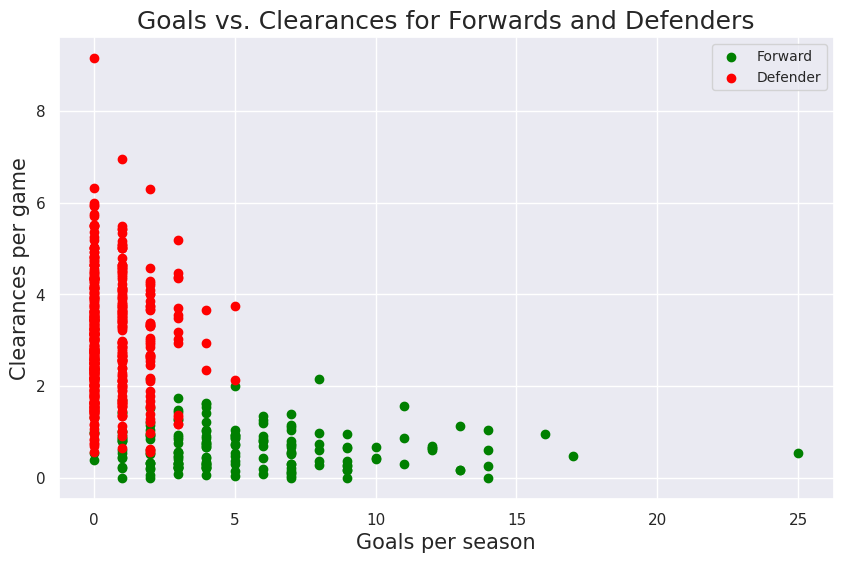

In [4]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Add the forwards to the plot.
plt.scatter(fw_goals, fw_clr, color = "green", label = "Forward")

# Add the non red card players to the plot.
plt.scatter(df_goals, df_clr, color = "red", label = "Defender")
plt.xlabel("Goals per season", fontsize = 15)
plt.ylabel("Clearances per game", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Goals vs. Clearances for Forwards and Defenders", fontsize = 18)
plt.show()

***
Fit the AdaBoost model.
***

In [5]:
# Instantiate the AdaBoost object.
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 10,
algorithm = "SAMME.R",learning_rate = 0.5)

# Fit the model.
ada_clf.fit(train_p, train_r)

# Get predictions.
ada_y_pred = ada_clf.predict(test_p)

# Print the results.
print(f"AdaBoost Classification Report")
print(classification_report(test_r, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       187
           1       0.89      0.81      0.85        73

    accuracy                           0.92       260
   macro avg       0.91      0.89      0.90       260
weighted avg       0.92      0.92      0.92       260
 



This does very well! Let's look into the results a little more by printing the confusion matrix and decision regions.

***
Get the confusion matrix.
***

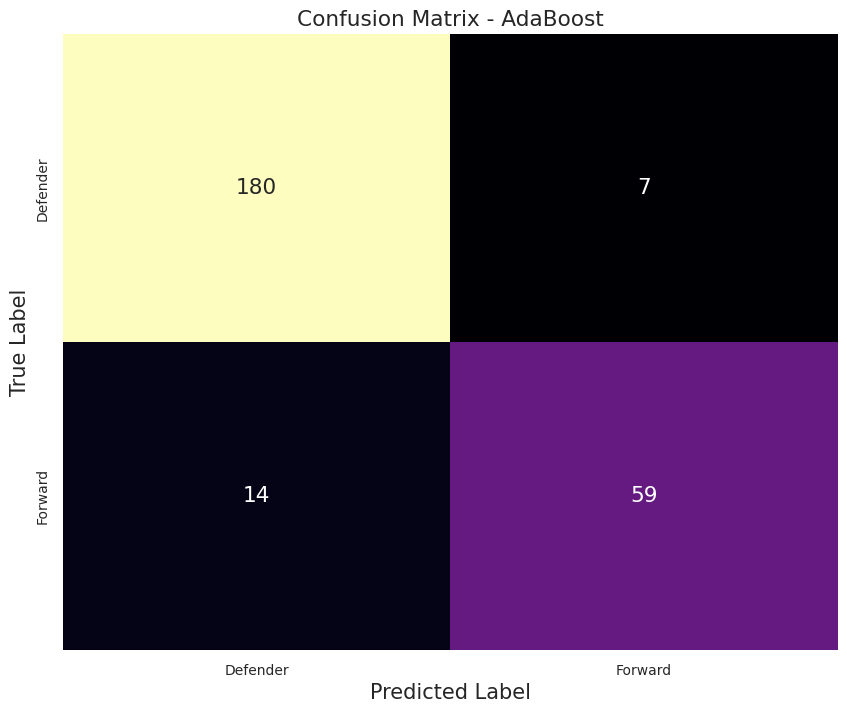

In [6]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(test_r, ada_y_pred)

# Set the figure size.
plt.figure(figsize=(10, 8))

# Set the axes.
ax = plt.axes()
sns.set(font_scale=1.3)

# Get a heatmap.
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma", cbar = False)

# Plot the data.
ax.set_title("Confusion Matrix - AdaBoost")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Defender", "Forward"],rotation = 0, fontsize = 10)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Defender", "Forward"], rotation= 90, fontsize = 10)
plt.show()

This continues to look good! We mispredict defenders more than forwards, but this makes sense because there are more defenders!

***
Let's also look at the plotted decision regions.
***

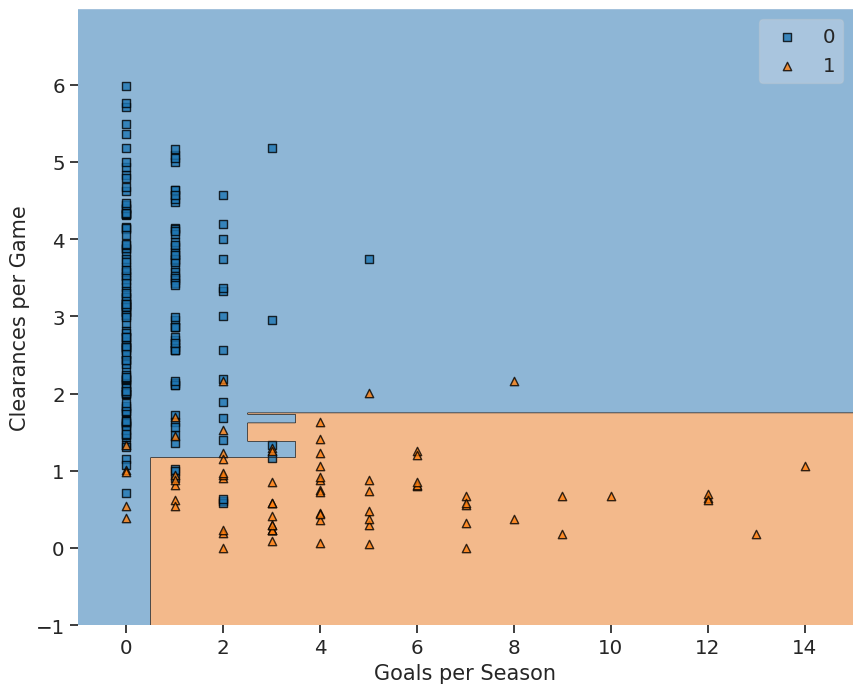

In [8]:
# Set the figure size.
plt.figure(figsize = (10, 8))

# Make the plot.
plot_decision_regions(test_p, test_r, clf = ada_clf)
plt.xlabel("Goals per Season", fontsize = 15)
plt.ylabel("Clearances per Game", fontsize = 15)
plt.grid()
plt.show()

## Gradient Boosting:


***
**Implementation:**
- Start by initializing a Gradient Boosting model, we often use decision trees as the base models.
- Fit the base model to the training data and calculate the differences between the actual and predicted values (residuals).
- Train subsequent base models to predict the residuals of the previous learners.
- Combine the predictions of all base learners, typically through a weighted sum, to make the final prediction.
- We can also regularize the model using techniques like shrinkage (learning rate) and tree depth to prevent overfitting.

Here is a graphic that describes gradient boosting:

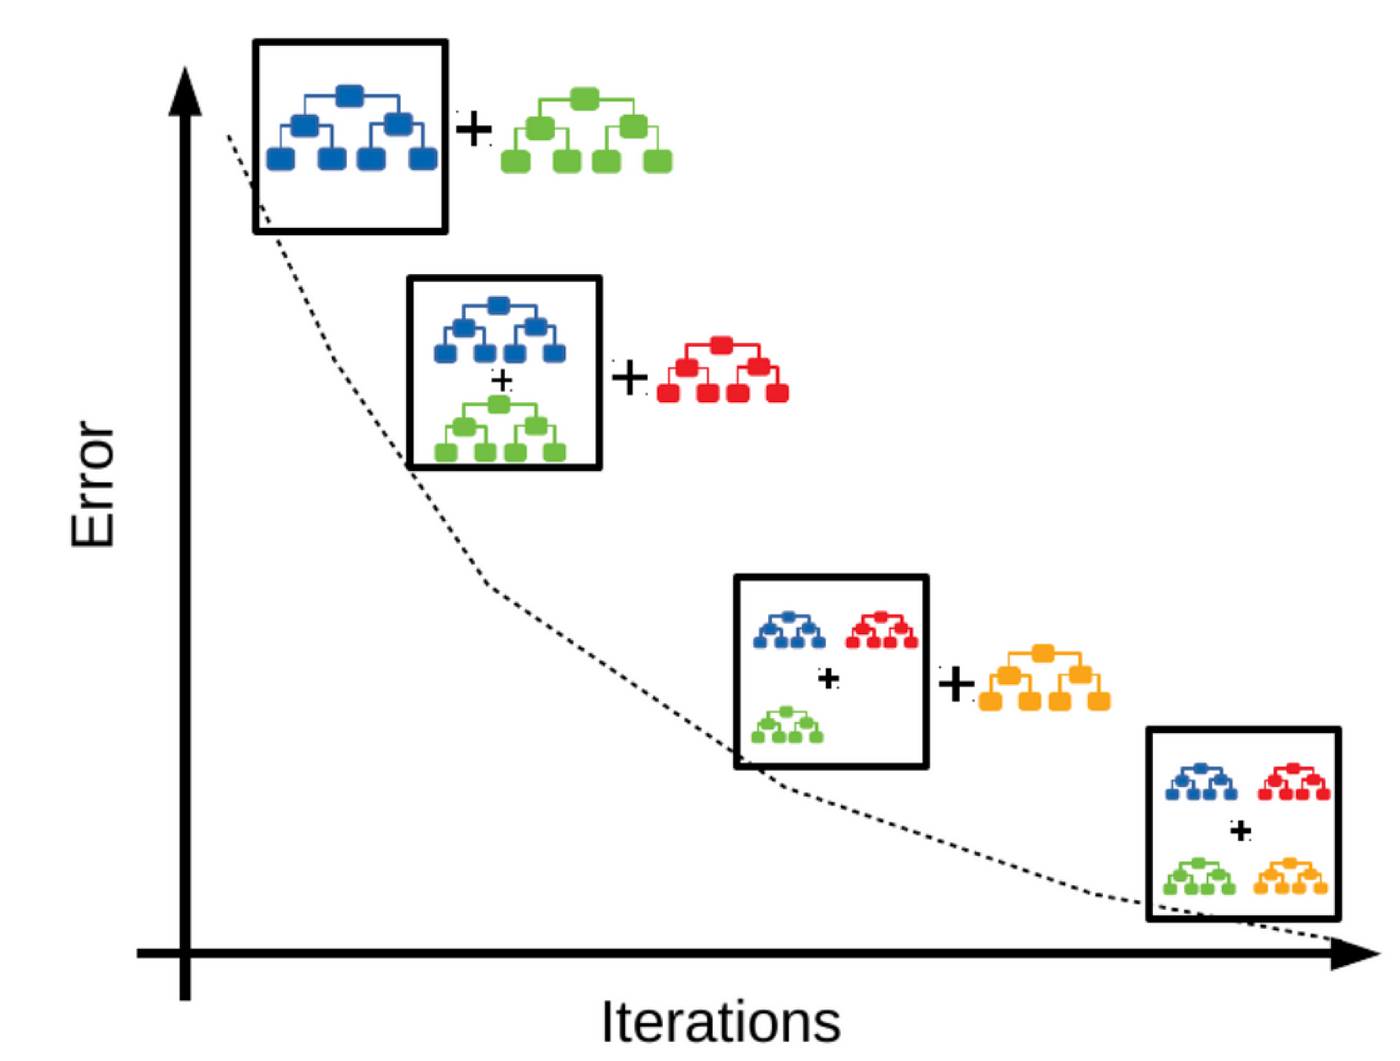

The image combines gradient descent with model fitting, and that is exactly what gradient boosting does!

**Advantages:**
1. Gradient Boosting often achieves high predictive accuracy, especially when using ensemble models with many trees.
2. It can handle different types of data (numeric, categorical) and can be used for both regression and classification tasks.
3. Gradient Boosting can handle missing data by effectively partitioning the data during tree construction.

**Disadvantages:**
1. Training Gradient Boosting models can be computationally expensive, especially with large datasets and complex models.
2. Gradient Boosting can be sensitive to noisy data and outliers, potentially leading to overfitting.
3. It requires careful tuning of hyperparameters such as the learning rate, tree depth, and number of trees to optimize performance and prevent overfitting.

Image source: [Medium](https://medium.com/@hemashreekilari9/understanding-gradient-boosting-632939b98764).
***

## Implementing the Gradient Boosting:

***
Import the data.
***

In [12]:
# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 250 data points.
data = soccer[:250]

# Selects carries into the penalty area as our predictor.
predictors = data[['CPA']]

# Now do the same for the clearances.
y = data[['Clr']]

# Convert each to a numpy array.
response = y.values
response = np.ravel(response)
predictors = predictors.values

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

***
Plot the data.
***

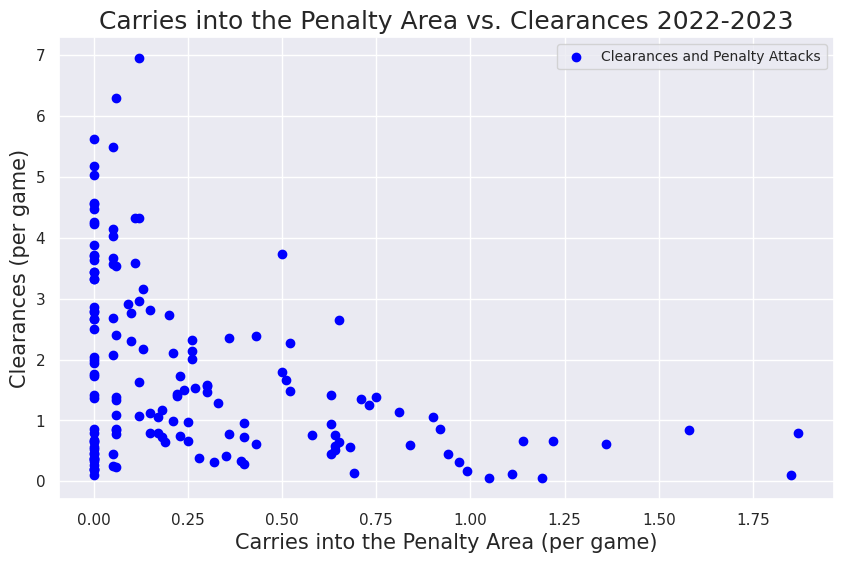

In [14]:
# Set the theme.
sns.set_theme()

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(train_p, train_r, color = "blue", label = "Clearances and Penalty Attacks")

# Add axis titles.
plt.xlabel("Carries into the Penalty Area (per game)", fontsize = 15)
plt.ylabel("Clearances (per game)", fontsize = 15)
plt.title("Carries into the Penalty Area vs. Clearances 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

***
Let's get the first three base models and see how they do.
***

In [24]:
# Implement an initial decision tree.
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(train_p, train_r)

# Get the predictions from the first tree.
pred1 = tree_reg1.predict(train_p)

# Get the residuals.
residuals = train_r - pred1

# Implement a second decision tree model.
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(train_p, residuals)

# Get the predictions from the second tree.
pred2 = tree_reg2.predict(train_p)

# Get the residuals from the second tree.
residuals2 = residuals - pred2

# Implement a third decision tree model.
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(train_p, residuals2)


DecisionTreeRegressor(max_depth=2, random_state=42)

***
Let's plot the trees to see how we did.
***

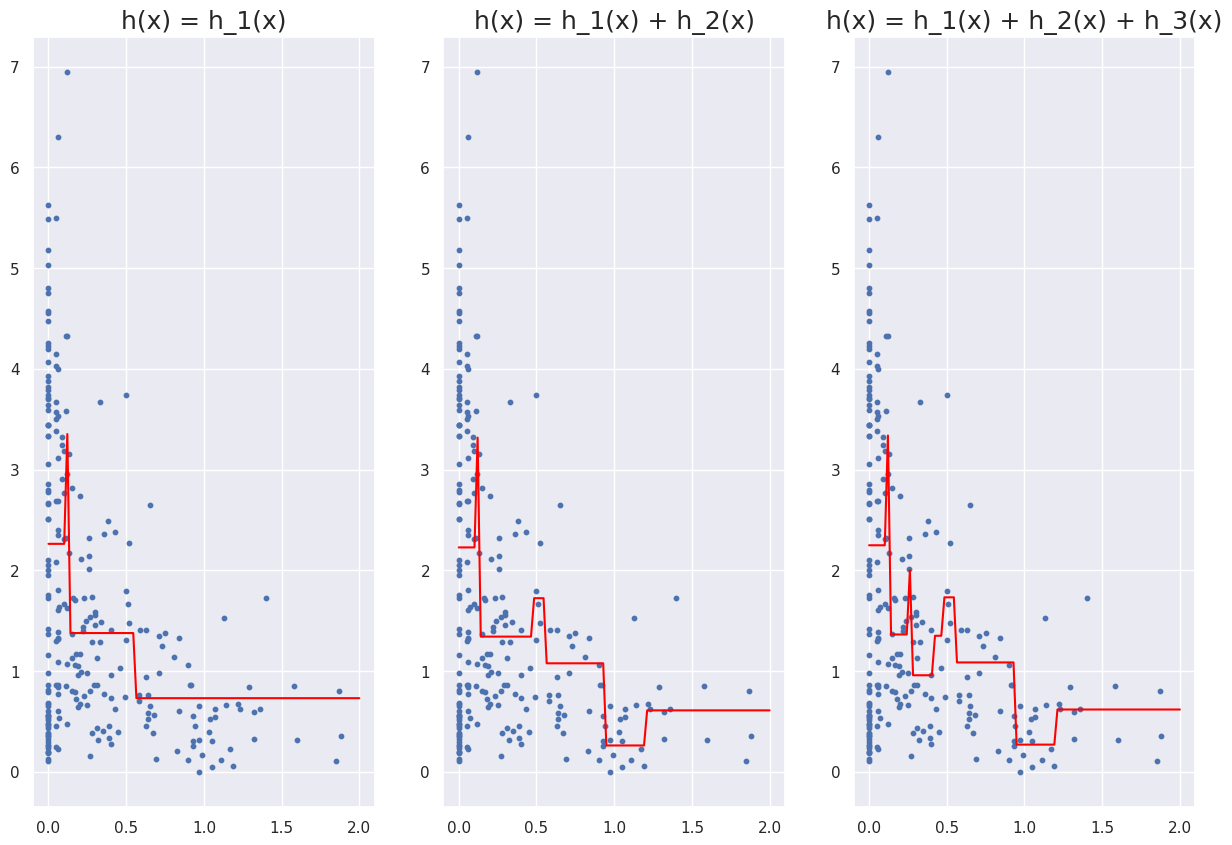

In [25]:
# Create three figures.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

# Set the domain
domain = np.linspace(0, 2, 100)

# Plot the first tree.
ax1.scatter(predictors, response, s=10)
ax1.plot(domain, tree_reg1.predict(domain.reshape(-1,1)), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

# Plot the second tree.
ax2.scatter(predictors, response, s=10)
ax2.plot(domain, tree_reg1.predict(domain.reshape(-1,1))+ tree_reg2.predict(domain.reshape(-1,1)), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

# Plot the third tree.
ax3.scatter(predictors, response, s=10)
ax3.plot(domain, tree_reg1.predict(domain.reshape(-1,1))+tree_reg2.predict(domain.reshape(-1,1))+tree_reg3.predict(domain.reshape(-1, 1)), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

We can see that the models get more and more complex. Is this a good thing?

***
Finally, let's implement the full gradient boosting algorithm.
***

In [26]:
# Fit the model
gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(train_p, train_r)

# Make predictions.
y_pred = gb_reg.predict(test_p)

***
Let's plot the final result.
***

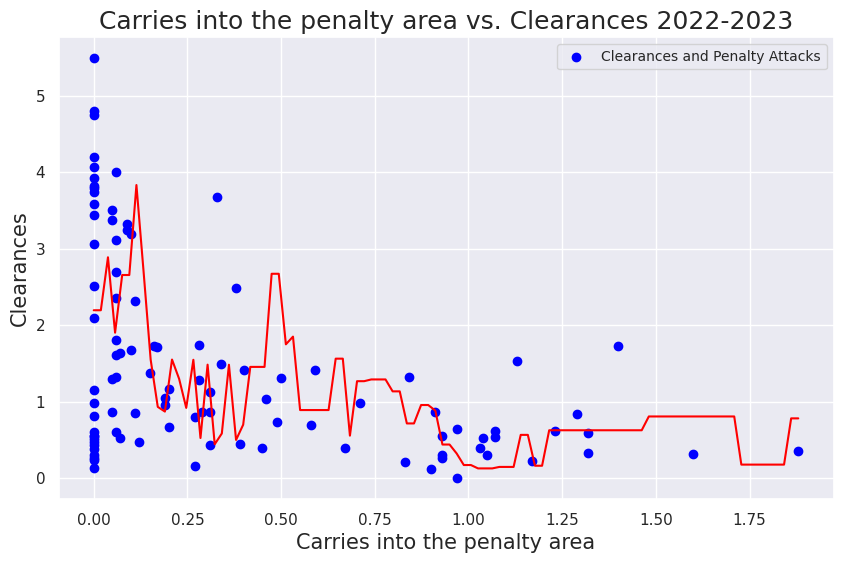

In [27]:
# Set the domain.
domain = np.linspace(np.min(predictors), np.max(predictors), 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Clearances and Penalty Attacks")

# Plot the model.
plt.plot(domain, gb_reg.predict(domain.reshape(-1,1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Carries into the penalty area", fontsize = 15)
plt.ylabel("Clearances", fontsize = 15)
plt.title("Carries into the penalty area vs. Clearances 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

The boosted model looks pretty good, but definitely seems overfit, one of the risks of gradient boosting.

***
Let's try adjusting the parameters to get something less overfit.
***

In [28]:
# Fit the model
gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate=0.025, random_state=42)
gb_reg.fit(train_p, train_r)

# Make predictions.
y_pred = gb_reg.predict(test_p)

***
Let's plot our results.
***

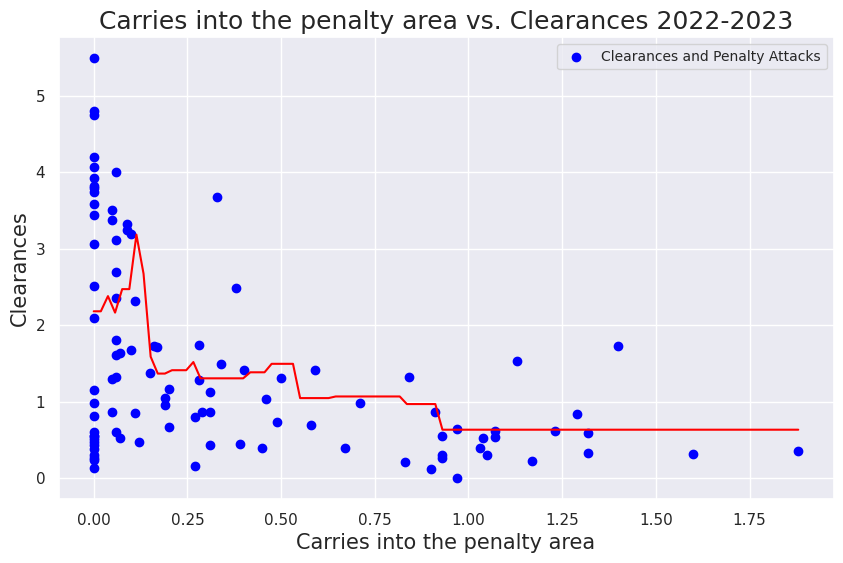

In [29]:
# Set the domain.
domain = np.linspace(np.min(predictors), np.max(predictors), 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Clearances and Penalty Attacks")

# Plot the model.
plt.plot(domain, gb_reg.predict(domain.reshape(-1,1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Carries into the penalty area", fontsize = 15)
plt.ylabel("Clearances", fontsize = 15)
plt.title("Carries into the penalty area vs. Clearances 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

Adjusting the parameters gets us a better model that seems less overfit and a better representation of the true spread of the data.

## Conclusions:

Boosting allowed us to combine many models to get better (hopefully) results. Here are some conclusions on boosting algorithms:

1. Improved Predictive Performance: Boosting algorithms, such as AdaBoost and Gradient Boosting, often lead to superior predictive performance compared to individual models.

2. Reduced Bias and Variance: Boosting techniques aim to reduce both bias and variance by combining multiple models into a strong ensemble model. By sequentially adjusting the weights of training instances or modifying the functional form of the model, boosting algorithms can adaptively fit the data, mitigating the risk of overfitting.

3. Versatility and Flexibility: Boosting algorithms are versatile and can be applied to a wide range of machine learning tasks, including classification, regression, and ranking. They can accommodate different base learners and loss functions, making them suitable for diverse problem domains and data types.

4. Sensitivity to Noisy Data and Outliers: Boosting algorithms are sensitive to noisy data and outliers, as we saw they can assign higher weights to misclassified instances during training. While boosting methods can effectively handle noisy data in some cases, they may become overly sensitive to outliers, leading to suboptimal performance.

Boosting algoithms are an effective way to combine many models to get better predictions. I look forwards to exploring them more.